##Filtro convolución

La función de convolución realiza el filtrado de los valores de píxel de una imagen, lo que se puede utilizar para aumentar su nitidez, difuminarla, detectar sus ejes u otros realces basados en el kernel.

Un filtro de convolución, para una imagen digital, en el espacio real (X,Y), puede representarse como una matriz cuadrada o rectangular (matriz de convolución), de dimensiones (M,N) mucho mas pequeñas que la des la imagen. La matriz de convolución se desplaza sobre la imagen de tal forma que el elemento central de la matriz de convolución coincida con cada uno de los píxeles de la imagen. En cada posición, se multiplica el valor de cada píxel de la imagen, que coincide en posición con un elemento de la matriz de convolución, por el valor de éste. El píxel de la imagen, que coincide con el elemento central de la matriz de convolución, es substituido por la suma de los productos.

Así por ejemplo, si tenemos la siguiente matriz de convolución:


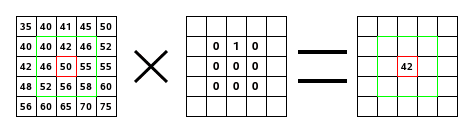

[[-1 -1 -1]
 [ 2  2  2]
 [-1 -1 -1]]
50.0


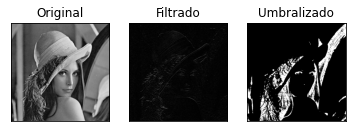

In [5]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena_std.tif', 0)

# Aplicar un filtro2D (convolución) con una matriz
# 5x5 de 1 multiplicado por (1/25) [Normalización de la matriz]
#kernel = np.ones((3,3),np.float32)/9
#kernel = np.array([[-1,-1,-1],[-1, 8,-1],[-1,-1,-1]])
kernel = np.array([[-1,-1,-1],[2, 2, 2],[-1,-1,-1]])
dst = cv2.filter2D(img,-1,kernel)
ret,umbral = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)

print(kernel)
print(ret)

plt.subplot(131),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst, cmap = 'gray'),plt.title('Filtrado')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(umbral, cmap = 'gray'),plt.title('Umbralizado')
plt.xticks([]), plt.yticks([])
plt.show()

##Filtros de imagenes

In [6]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('lena_std.tif', 0)

###Convolución

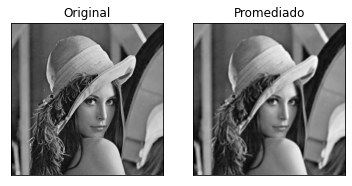

In [7]:
# Aplicar un filtro2D (convolución) con una matriz
# 5x5 de 1 multiplicado por (1/25) [Normalización de la matriz]
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap = 'gray'),plt.title('Promediado')
plt.xticks([]), plt.yticks([])
plt.show()

###Emborronamiento(Desenfocar) de las imágenes

Para difuminar una imagen con Python, debemos hacer uso del método blur () que ofrece el paquete OpenCV. Este método admite una variedad de argumentos, sobre los que puede leer aquí . Hay dos argumentos importantes para pasar a esta
función:

src : Esta es nuestra imagen de origen, es decir, la imagen a la que aplicaremos la técnica de desenfoque.
ksize : esta es una tupla que representa el tamaño de nuestro kernel. Especificará el tamaño de la matriz que se utilizará para promediar los píxeles vecinos.

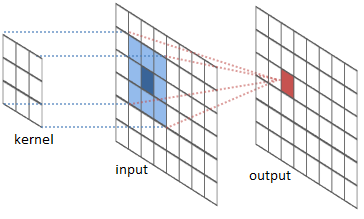

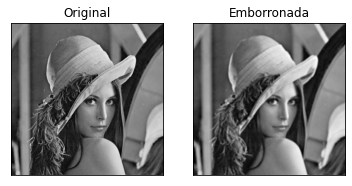

In [10]:
# Emborronamiento de las imágenes
# Se usa filtrado pasabajas para eliminar ruido de alta frecuencia (el más común)
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap = 'gray'),plt.title('Emborronada')
plt.xticks([]), plt.yticks([])
plt.show()



###Filtro Gaussiano

El filtro gaussiano es un filtro de suavizado lineal que puede eliminar el ruido gaussiano y se usa ampliamente en el proceso de eliminación de ruido del procesamiento de imágenes. El filtrado gaussiano es el proceso de promedio ponderado de toda la imagen. El valor de cada píxel se obtiene mediante el promedio ponderado de sí mismo y otros valores de píxeles en la vecindad. La operación específica del filtrado gaussiano es usar una plantilla (o convolución, máscara) para escanear cada píxel en la imagen y usar la escala de grises promedio ponderada de los píxeles en la vecindad determinada por la plantilla para reemplazar el valor del píxel central de la plantilla.

El efecto visual de la imagen generada por la tecnología de desenfoque gaussiano es como observar la imagen a través de una pantalla semitransparente, lo cual es obvio por el efecto de imagen desenfocado de la lente y la Efecto a la sombra de la iluminación ordinaria diferente. El suavizado gaussiano también se utiliza en la etapa de preprocesamiento de los algoritmos de visión por computadora para mejorar el efecto de imagen de las imágenes a diferentes escalas. Desde un punto de vista matemático, el proceso de desenfoque gaussiano de una imagen es la convolución de la imagen y la distribución normal. Dado que la distribución normal también se denomina distribución gaussiana, esta técnica se denomina desenfoque gaussiano.

La convolución de la imagen borrosa con el cuadro circular producirá un efecto de imagen desenfocado más preciso. Dado que la transformada de Fourier de la función gaussiana es otra función gaussiana, el desenfoque gaussiano es una operación de filtrado de paso bajo para la imagen.

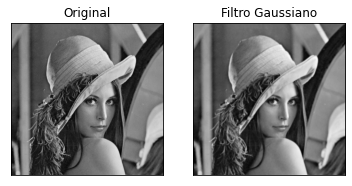

In [15]:
# Filtrado Gaussiano
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap = 'gray'),plt.title('Filtro Gaussiano')
plt.xticks([]), plt.yticks([])
plt.show()



###Filtro Mediana

El filtrado según la mediana es una buena forma de filtrar el ruido aleatorio "sal y pimienta", por ejemplo, porque no cambia los niveles de intensidad en la imagen, solo utiliza los niveles disponibles. Si las diferencias locales entre intensidades no son demasiado grandes, no cambiarán los bordes de la imagen de forma significativa. También podría resultar útil conocer el ruido, la diferencia entre la imagen original y la filtrada, para fines de análisis.

Además de quitar el ruido, el filtrado de mediana tiende a quitar las pequeñas nitideces de una imagen.

La función devuelve una matriz de imagen que contiene la transformación de intensidad especificada.

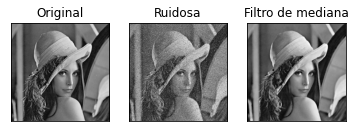

In [ ]:
# Filtro de mediana
# Función para añadir ruido sal y pimienta a una imagen
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


noise_img = sp_noise(img,0.05)
#Aplico el filtro de la mediana
median = cv2.medianBlur(noise_img, 5)

plt.subplot(131),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(noise_img, cmap = 'gray'),plt.title('Ruidosa')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(median, cmap = 'gray'),plt.title('Filtro de mediana')
plt.xticks([]), plt.yticks([])
plt.show()



###Filtro bilateral

El filtro bilateral (filtro bilateral) es un filtro que puede preservar el borde y el ruido.La razón de este efecto de eliminación de ruido es que el filtro se compone de dos funciones. Una función es determinar los coeficientes del filtro por la distancia espacial geométrica. El otro depende de la diferencia de píxeles para determinar el coeficiente del filtro. Dos filtros que se pueden comparar: filtro de paso bajo gaussiano Y filtro medio censurado por α (elimine el valor promedio de los píxeles restantes después de eliminar los porcentajes mínimo y máximo de α como filtro)

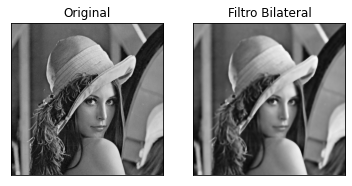

In [ ]:

# Filtro bilateral
blateral = cv2.bilateralFilter(img, 9, 75, 75)
plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blateral, cmap = 'gray'),plt.title('Filtro Bilateral')
plt.xticks([]), plt.yticks([])
plt.show()

##Ruido sal y pimienta

El ruido sal y pimienta (salt-and-pepper noise) que se presenta principalmente en imágenes. Se caracteriza principalmente por cubrir de forma dispersa toda la imagen con una serie de píxeles blancos y negros.

Este tipo de ruido suele producirse cuando la señal de la imagen es afectada por intensas y repentinas perturbaciones o impulsos.

Una forma efectiva para la reducción de este tipo de ruido es mediante el uso de filtros medianos1​ o filtros morfológicos.2​ A diferencia de los filtros basados en la media empleados para la reducción de ruido Gaussiano, la salida de los filtros medianos utiliza el valor de la mediana de la vecindad de cada píxel, por lo que este tipo de ruido puede ser rápida y eficientemente eliminado.

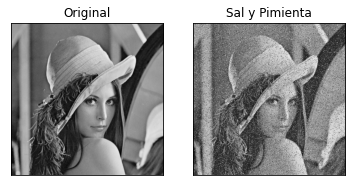

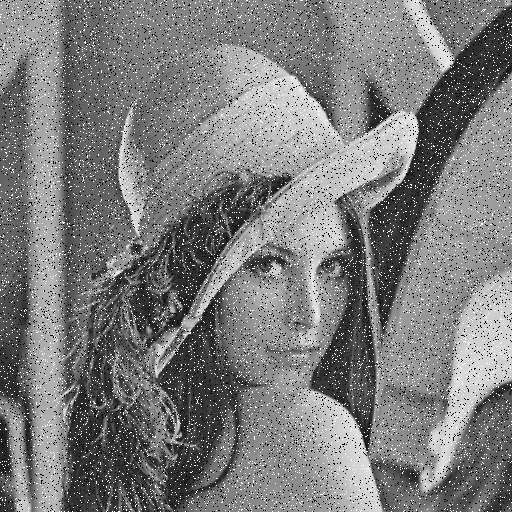

In [ ]:
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt

img = cv2.imread('lena_std.tif')

# Función para añadir ruido sal y pimienta a una imagen
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

# --Las operaciones que se hacen en el frame--
# En este caso se hace que lo capturado este en escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noise_img = sp_noise(gray,0.05)

# Mostrar el frame resultante

plt.subplot(121),plt.imshow(gray, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noise_img, cmap = 'gray'),plt.title('Sal y Pimienta')
plt.xticks([]), plt.yticks([])
plt.show()
cv2_imshow(noise_img)